In [1]:
# Import ImageIO
import imageio

# Load "chest-220.dcm"
im = imageio.imread("chest-220.dcm")

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)


In [3]:
print(im.meta.keys())

print(im.meta['Modality'])

print(im.meta['sampling'])

print(im.meta['PatientSex'])

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])
CT
(0.976562, 0.976562)
F 


In [4]:
# Import ImageIO and PyPlot 
import imageio
import matplotlib.pyplot as plt

# Read in "chest-220.dcm"
im = imageio.imread("chest-220.dcm")

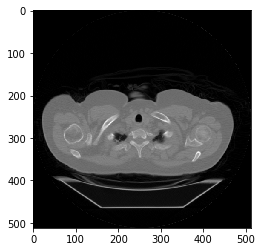

In [5]:
# Draw the image in grayscale
plt.imshow(im, cmap='gray')

# Render the image
plt.show()

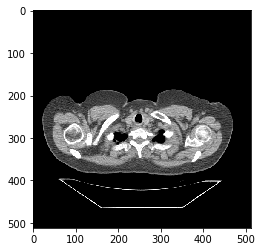

In [6]:
# Draw the image with greater contrast
plt.imshow(im, cmap='gray', vmin=-200,vmax=200)

# Render the image
plt.show()

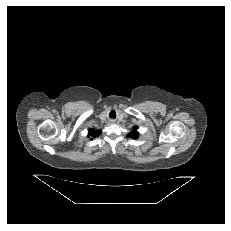

In [8]:
# Draw the image with greater contrast
plt.imshow(im, cmap='gray', vmin=-200,vmax=200)

# Remove axis ticks and labels
plt.axis('off')

# Render the image
plt.show()

In [9]:
# Import ImageIO and NumPy
import imageio
import numpy as np

# Read in each 2D image
im1 = imageio.imread('chest-220.dcm')
im2 = imageio.imread('chest-221.dcm')
im3 = imageio.imread('chest-222.dcm')

# Stack images into a volume
vol = np.stack([im1, im2, im3])
print('Volume dimensions:', vol.shape)

Volume dimensions: (3, 512, 512)


In [10]:
# Import ImageIO
import imageio

# Load the "tcia-chest-ct" directory
vol = imageio.volread("tcia-chest-ct")

# Print image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.meta.shape)

Reading DICOM (examining files): 1/5 files (20.0%5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)
Available metadata: odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])
Shape of image array: (5, 512, 512)


The amount of physical space covered by an image is its field of view, which is calculated from two properties:

Array shape, the number of data elements on each axis. Can be accessed with the shape attribute.
Sampling resolution, the amount of physical space covered by each pixel. Sometimes available in metadata (e.g., meta['sampling']).
For this exercise, multiply the array shape and sampling resolution along each axis to calculate the field of view of vol. All values are in millimeters.

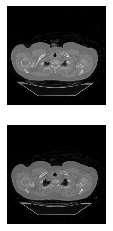

In [11]:
# Import PyPlot
import matplotlib.pyplot as plt

# Initialize figure and axes grid
fig, axes = plt.subplots(nrows=2, ncols=1)

im1 = imageio.imread('chest-220.dcm')
im2 = imageio.imread('chest-221.dcm')
# Draw an image on each subplot
axes[0].imshow(im1,cmap='gray')
axes[1].imshow(im2,cmap='gray')

# Remove ticks/labels and render
axes[0].axis('off')
axes[1].axis('off')
plt.show()

Reading DICOM (examining files): 1/5 files (20.0%5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)


<Figure size 1080x720 with 0 Axes>

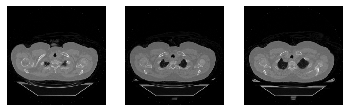

In [20]:
vol = imageio.volread("tcia-chest-ct")
# Plot the images on a subplots array 
plt.figure(figsize=(15,10))
fig, axes =  plt.subplots(nrows=1, ncols=3)

# Loop through subplots and draw image
for ii in range(3):
    im = vol[ii*2, :, :]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')
    
# Render the figure
plt.show()

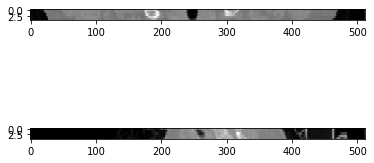

In [42]:
# Select frame from "vol"
im1 = vol[:, 256, :]
im2 = vol[:, :, 256]

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2
asp2 = d0 / d1

# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(im1, cmap='gray', aspect=asp1)
axes[1].imshow(im2, cmap='gray', aspect=asp2)
plt.show()

In [43]:
def format_and_render_plot():
    '''Custom function to simplify common formatting operations for exercises. Operations include: 
    1. Turning off axis grids.
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.'''
    fig = plt.gcf()
    fig.axes[0].axis('off')
    plt.tight_layout()
    plt.show()

Data type: uint8
Min. value: 3
Max value: 224


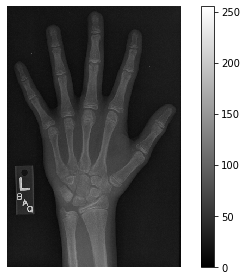

In [46]:
# Load the hand radiograph
im = imageio.imread('hand.png')
print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

# Plot the grayscale image
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
format_and_render_plot()

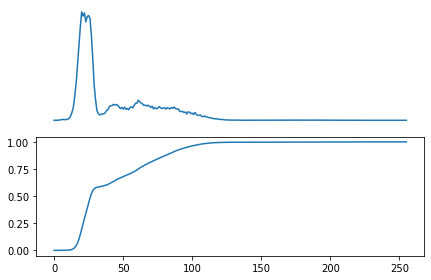

In [48]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi 

# Create a histogram, binned at each possible value
hist = ndi.histogram(im, min=0, max=255, bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
format_and_render_plot()

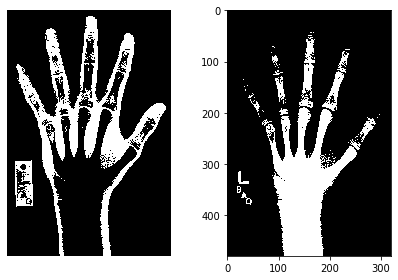

In [65]:
# Create skin and bone masks
mask_bone = (im>=70)
mask_skin = (im>=40) & (im<70)

# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_skin, cmap='gray')
axes[1].imshow(mask_bone, cmap='gray')
format_and_render_plot()

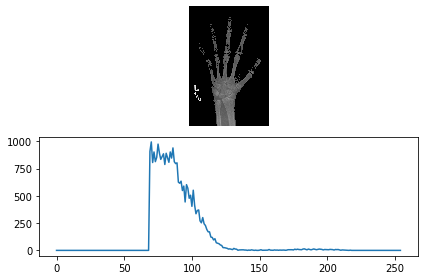

In [68]:
# Import SciPy's "ndimage" module
from scipy import ndimage 

# Screen out non-bone pixels from "im"
mask_bone = (im >= 70)
im_bone = np.where(im >= 70, im, 0)

# Get the histogram of bone intensities
hist = ndimage.histogram(im_bone, min=1, max=255, bins=255)

# Plot masked image and histogram
fig, axes = plt.subplots(2,1)
axes[0].imshow(im_bone,cmap='gray')
axes[1].plot(hist)
format_and_render_plot()

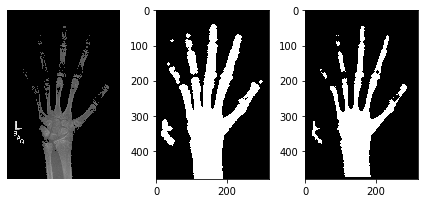

In [71]:
# Create and tune bone mask
mask_bone = np.where(im>=75, im, 0)
mask_dilate = ndi.binary_dilation(mask_bone, iterations = 5)
mask_closed = ndi.binary_closing(mask_bone, iterations = 5)

# Plot masked images
fig, axes = plt.subplots(1,3)
axes[0].imshow(mask_bone, cmap='gray')
axes[1].imshow(mask_dilate, cmap='gray')
axes[2].imshow(mask_closed, cmap='gray')
format_and_render_plot()

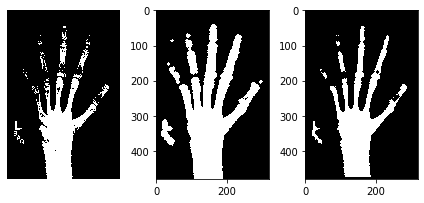

In [74]:
# Create and tune bone mask
mask_bone = im >= 75
mask_dilate = ndi.binary_dilation(mask_bone, iterations=5)
mask_closed = ndi.binary_closing(mask_bone, iterations=5)

# Plot masked images
fig, axes = plt.subplots(1,3)
axes[0].imshow(mask_bone, cmap='gray')
axes[1].imshow(mask_dilate, cmap='gray')
axes[2].imshow(mask_closed, cmap='gray')
format_and_render_plot()

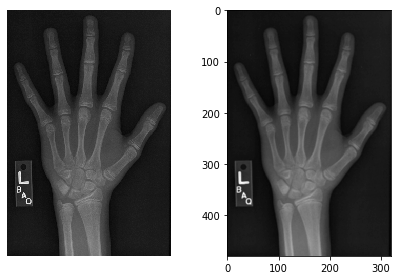

In [76]:
# Set filter weights
weights = [[0.11, 0.11, 0.11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, 0.11]]

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights)

# Plot the images
fig, axes = plt.subplots(1,2)
axes[0].imshow(im,cmap='gray')
axes[1].imshow(im_filt,cmap='gray')
format_and_render_plot()

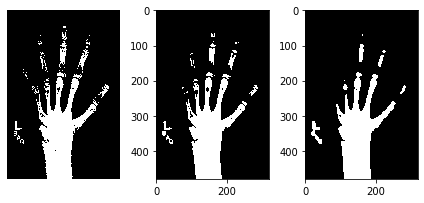

In [79]:
# Smooth "im" with Gaussian filters
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 = ndi.gaussian_filter(im, sigma=3)

# Draw bone masks of each image
fig, axes = plt.subplots(1,3)
axes[0].imshow(im >= 75,cmap='gray')
axes[1].imshow(im_s1 >= 75,cmap='gray')
axes[2].imshow(im_s3 >= 75,cmap='gray')
format_and_render_plot()

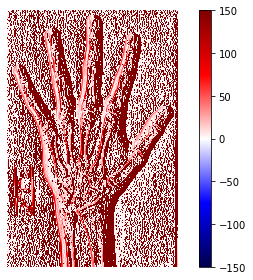

In [80]:
# Set weights to detect vertical edges
weights = [[1, 0, -1 ], [1, 0, -1], [1, 0, -1]]

# Convolve "im" with filter weights
edges = ndi.convolve(im, weights)

# Draw the image in color
plt.imshow(edges, cmap='seismic', vmin=-150, vmax=150)
plt.colorbar()
format_and_render_plot()